In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

## Choose processing parameters

In [2]:
# Choose what type of imputation you want to perform: (1) event mean imputation, (2) population mean imputation, or (3) forward/backward filling for each patient
imputation_type = 3

if imputation_type not in range(1,4):
    raise Exception("Choose imputation type 1, 2 or 3")

# Choose whether patients that cannot have their data imputed using forward/backward filling must be removed
prune_empty_cols = True

if imputation_type == 3 and prune_empty_cols == False:
    raise Exception("Pruning must be applied if forward/backward filling is used for imputation")

## Diabetes patient clinical data input and cleaning

### Read all clinical data CSVs and merge them

In [3]:
# Set Pandas options to display more columns
pd.options.display.max_columns=150

# Read in the diabetes CSVs
df1 = pd.read_csv('data_diabetes/Hba1_2015 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df2 = pd.read_csv('data_diabetes/Hba1_2016 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df3 = pd.read_csv('data_diabetes/Hba1_2017 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df4 = pd.read_csv('data_diabetes/Hba1_2018 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df5 = pd.read_csv('data_diabetes/Hba1_2019_1 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df6 = pd.read_csv('data_diabetes/Hba1_2019_2 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df7 = pd.read_csv('data_diabetes/Hba1_2020_1 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df8 = pd.read_csv('data_diabetes/Hba1_2020_2 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df9 = pd.read_csv('data_diabetes/Hba1_2021_1 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df10 = pd.read_csv('data_diabetes/Hba1_2021_2 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df11 = pd.read_csv('data_diabetes/Hba1_2022_1 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df12 = pd.read_csv('data_diabetes/Hba1_2022_2 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')
df13 = pd.read_csv('data_diabetes/Hba1_2023_1 bewerkt met sleutel 17-07-2023.csv', sep=';', encoding='unicode_escape')

df_full = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], axis=0).reset_index(drop = True)

# Show a snapshot of data
df_full

,PIN 3 versleuteld,PIN 4 versleuteld,Geb datum versleuteld,Internal Id en lowestobjecttime,Afname datum,11-deoxycortisol S,1eSpijtserum,25-OH-D3,25OHVitD_W,2D6*3,5HIAA_24,5HIAA_Ukr,5HIAA_Ukr.1,9OH-Risp µg/l,ACE,ACTH,AF,AFP,AHAVT,ALAT,ANA,ANCA_Pr3n,APTT_scr,APTT_scr_W,ASAT,AST,ATLY,Act-B12,Afw_pop_Im,Alb,AlbKr,Alb_U_kw,Aldo-Re_ra,Aldoster,Amitript µg/l,Amitript µg/l.1,Amyl_U,Amylase,Anemie,Anti-CCP,Anti-HIV,Anti-TPO_n,AsGladSp,AsMitoch,AsParcel,As_scr,As_tabel,B-Lymfo,BAHBC,BAHBS,BE_g,BE_ven,BHBSAG,BSE,Baso,Beschrijving,Beta_2GP,Bili_U,Bili_U_W,Bili_dir,Bili_tot,Bl_Lymfatisch,Bl_Myeloid,Blast,Blasten_Im,Bloedgr_Rh,CA125,CA125_W,CA15_3,CA15_3_W,CA19_9_W,CD10+BL,CD10-BL,CD4+TL,CD8+TL,...,Clonazep µg/l,DAT,DAT_C3c,DAT_C3d,DAT_IgA,DAT_IgG,DAT_IgM,HCO3_iS1,HGH,Pipamper,Promono,St_ArtR,St_VZV,Tryptase,ACaseine,AMakreel,AOester,AZeebanket,Anti-GAD65,Anti-IA-2,Chromg_A,Desipram µg/l,ImiprTot,Imiprami µg/l,Long_EBV,MProt_U,St_Psitt,Anti-HBc,CYSC,Conc_HLADQ,DNA_NIJ_EDTA,Ery_U_POC_AE,F_VIII,Guc_U_kwal_POC_AE,IGF-1,Keton_U_POC_AE,Leuco_U_POC_AE,Oestr_T,St_HSV,TE_U_kw_POC_AE,AAmbrosius,AAubergine,AKokosnoot,AParanoot,ASpinazie,EGFR Cyst C,Aldosteron,Ciclo_A,Ery_Schis,Glucagon,HBe-Ag,HBsAg conf,Inhib_b,Non-HDL,PCT,St_LymfR,VitB1.1,Anti-HBe,AKI Alert,Ca_U,Concl_Lactase_genoty,DPYD_concl,Fenobarb,Lactase_genotyp,ABomen,C1236,C1679,C1905,C2846,Cl_U,FT3,AAnanas,AKiwi,AKomkommer,ASinaasapp
0,NaN,1.720258e+08,4-1-1950,"9,50E+11",26-2-2015,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.12,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,6.563704e+08,6-1-1999,"9,50E+11",15-4-2015,-,-,-,-,-,-,-,-,-,-,-,-,-,-,13.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,16.00,-,-,-,-,-,-,16.98,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,9.541864e+08,20-4-1933,"9,50E+11",7-4-2015,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.48,5.00,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.017353e+09,7-8-1929,"9,50E+11",12-5-2015,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.017353e+09,7-8-1929,"9,50E+11",1-9-2015,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### Clean combined data

In [4]:
# Retain only columns that are of interest to us
df_main = df_full[['PIN 3 versleuteld','PIN 4 versleuteld', 'Afname datum', 'Unnamed: 4', 'Geb datum versleuteld', 'Geb. datum versleuteld', 'ALAT', 'ASAT', 'AlbKr', 'Alb_U_kw', 'Chol', 'Ery', 'GFR-MDRD', 'Gluc_n', 'HDL_chol', 'Hb', 'HbA1c (IFCC)', 'HbA1c (IFCC).1', 'HbA1c (IFCC).2', 'Ht', 'K', 'Kreat', 'LDL_chol', 'Leuco', 'MCH', 'MCHC', 'MCV', 'Na', 'PDW', 'RDW', 'TSH', 'CKD-epi']].copy()

# Rename some columns for clarity
df_main = df_main.rename(columns={'Afname datum': 'Time', 'Geb datum versleuteld': 'Date of birth'})
df_main = df_main.replace('-', np.nan)
df_main = df_main.replace('?', np.nan)

# As some of the data has the visit time column named differently (Unnamed: 4), fill all empty Time column records with the value from the other column.
df_main['Time'].fillna(df_main['Unnamed: 4'], inplace=True)

# Merge some column values into another column because they are variations that signify the same biomarker
df_main['HbA1c (IFCC)'].fillna(df_main['HbA1c (IFCC).1'], inplace=True)
df_main['HbA1c (IFCC)'].fillna(df_main['HbA1c (IFCC).2'], inplace=True)
df_main['GFR-MDRD'].fillna(df_main['CKD-epi'], inplace=True)
df_main['Date of birth'].fillna(df_main['Geb. datum versleuteld'], inplace=True)

# Use PIN 3 and PIN 4 to create a unique identifier for each patient, as a record may contain only one or both of these PINs
df_main.insert(loc=0, column='ID', value=df_main.set_index(['PIN 3 versleuteld','PIN 4 versleuteld','Date of birth']).index.factorize()[0]+1)

# Remove PIN, unnamed, partial HbA1c, and CKD-epi columns because they have served their purpose
df = df_main.drop(['PIN 3 versleuteld','PIN 4 versleuteld', 'Unnamed: 4', 'HbA1c (IFCC).1', 'HbA1c (IFCC).2', 'CKD-epi', 'Geb. datum versleuteld'], axis = 1)

df

,ID,Time,Date of birth,ALAT,ASAT,AlbKr,Alb_U_kw,Chol,Ery,GFR-MDRD,Gluc_n,HDL_chol,Hb,HbA1c (IFCC),Ht,K,Kreat,LDL_chol,Leuco,MCH,MCHC,MCV,Na,PDW,RDW,TSH
0,1,26-2-2015,4-1-1950,NaN,NaN,0.12,NaN,5.03,5.36,73.99,5.02,1.51,9.80,31.00,0.47,4.48,89.40,3.18,5.40,1.83,21.10,86.80,145.00,13.20,13.80,NaN
1,2,15-4-2015,6-1-1999,13.00,NaN,NaN,NaN,4.13,4.49,NaN,NaN,1.35,8.30,32.60,0.40,NaN,56.00,2.37,5.30,1.85,20.70,89.30,NaN,12.90,14.10,1.50
2,3,7-4-2015,20-4-1933,NaN,NaN,0.48,5.00,5.88,NaN,70.66,6.80,1.43,NaN,54.00,NaN,4.21,69.00,3.69,NaN,NaN,NaN,NaN,141.00,NaN,NaN,4.20
3,4,12-5-2015,7-8-1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1-9-2015,7-8-1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737005,128793,9-2-2023,6-7-1929,31.00,27.00,NaN,NaN,3.10,4.93,75.42,5.70,1.18,9.10,42.20,0.45,4.80,60.00,1.60,6.54,1.85,20.20,91.30,136.00,12.40,13.20,1.80
737006,41350,16-3-2023,21-10-1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,39.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737007,56382,22-6-2023,11-7-1956,NaN,NaN,0.73,3.78,NaN,NaN,51.98,5.94,NaN,NaN,43.60,NaN,4.33,97.60,NaN,NaN,NaN,NaN,NaN,141.10,NaN,NaN,NaN
737008,78341,7-2-2023,12-10-1943,NaN,NaN,NaN,NaN,NaN,NaN,48.68,5.07,NaN,NaN,54.10,NaN,4.79,95.90,NaN,NaN,NaN,NaN,NaN,142.10,NaN,NaN,NaN


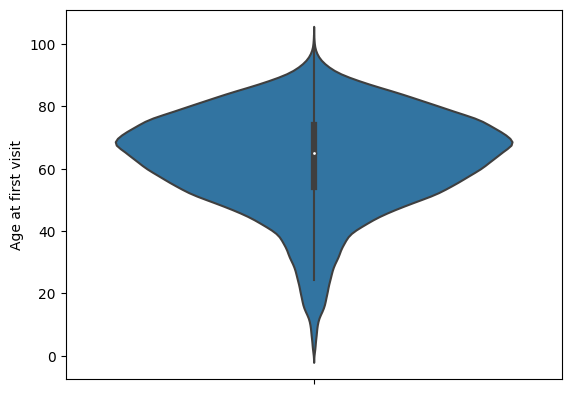

In [5]:
# Plot age distribution
df2 = df[['ID', 'Time', 'Date of birth', 'GFR-MDRD']].copy()

df2['Time'] = pd.to_datetime(df2['Time'], format='%d-%m-%Y')
df2['Date of birth'] = pd.to_datetime(df2['Date of birth'], format='%d-%m-%Y')

df2 = df2.sort_values(by=['ID','Time'], ascending = [True, True]).reset_index(drop = True)

df2.insert(loc=2, column='Age_at_visit', value=((df2['Time'] - df2['Date of birth']).dt.days / 365.25).round(1))
df2 = df2.drop(['Date of birth'], axis=1)

df2 = df2.copy().rename(columns={"Age_at_visit" : "Age at first visit"})

df3 = df2.groupby(['ID']).first()

sns.violinplot(data=df3, y="Age at first visit")
plt.savefig('diabetes_rawagedistribution.png')

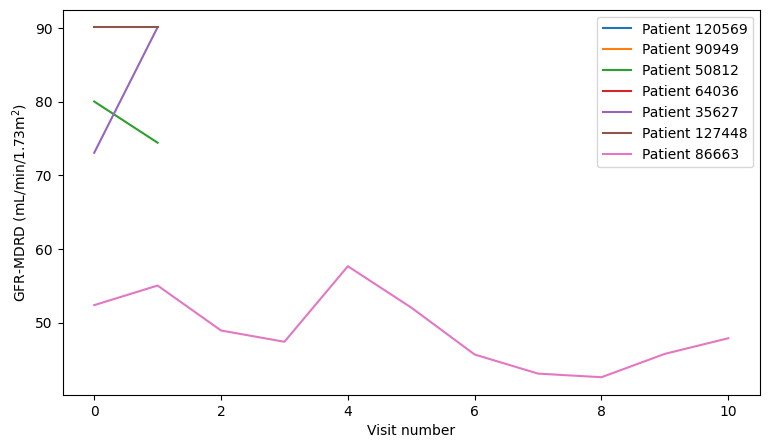

In [ ]:
# Visualise the progression trajectory of various patients towards kidney failure based on their GFR-MDRD score
df4 = df2.copy()

df4['GFR-MDRD'] = df4['GFR-MDRD'].astype(float)

# Set Time to visit number
IDs = df4["ID"].unique().tolist()
dfs = []

for id in IDs:
    subDf = df4[df4['ID'] == id]
    tempdf = subDf.copy()
    tempdf['Time'] = tempdf['Time'].astype('category')
    tempdf['Time'] = tempdf['Time'].cat.codes
    dfs.append(tempdf)

df4 = pd.concat(dfs)

df4 = df4.sort_values(by=['ID','Time'], ascending = [True, True]).reset_index(drop = True)

patientIDlist = random.sample(range(0, df4.ID.max()), 7)
plt.figure(figsize=(9, 5))

for patientID in patientIDlist:
    seqs = df4[df4['ID'] == patientID]
    gfrmdrdlist = seqs['GFR-MDRD'].tolist()

    plt.plot(range(len(gfrmdrdlist)), gfrmdrdlist, label=('Patient '+str(patientID)))

plt.legend()
plt.xlabel("Visit number")
plt.ylabel("GFR-MDRD (mL/min/1.73m$^2$)")
plt.savefig('diabetesrawdatasequences.png')
plt.show()

In [35]:
# Remove records that do not contain the prediction target variable: GFR-MDRD
df = df.dropna(subset=['GFR-MDRD'])

# Remove patients with 9 or less visits
v = df.ID.value_counts()
df = df[df.ID.isin(v.index[v.gt(9)])]

# If two rows were recorded on the same day, retain only the last one
IDs = df["ID"].unique().tolist()
dfs = []

for id in IDs:
    subDf = df[df['ID'] == id]
    tempdf = subDf.copy()
    tempdf = tempdf.drop_duplicates(subset='Time', keep="last")
    dfs.append(tempdf)

df = pd.concat(dfs)

# Remove patients with 9 or less visits again after dropping same day records
v = df.ID.value_counts()
df = df[df.ID.isin(v.index[v.gt(9)])]

df

,ID,Time,Date of birth,ALAT,ASAT,AlbKr,Alb_U_kw,Chol,Ery,GFR-MDRD,Gluc_n,HDL_chol,Hb,HbA1c (IFCC),Ht,K,Kreat,LDL_chol,Leuco,MCH,MCHC,MCV,Na,PDW,RDW,TSH
3437,1922,5-1-2015,27-7-1938,NaN,NaN,1.36,3.00,5.19,NaN,63.14,6.20,1.02,NaN,49.00,NaN,4.87,77.00,2.27,NaN,NaN,NaN,NaN,143.00,NaN,NaN,NaN
35325,1922,11-3-2015,27-7-1938,11.00,15.00,NaN,NaN,4.06,3.90,32.19,8.80,1.58,6.80,54.00,0.35,4.68,138.00,1.97,7.00,1.74,19.40,89.70,144.00,NaN,14.70,2.60
35326,1922,17-6-2015,27-7-1938,NaN,NaN,0.49,8.00,4.31,NaN,33.57,8.80,1.41,NaN,47.00,NaN,4.98,133.00,2.33,NaN,NaN,NaN,NaN,144.00,NaN,NaN,NaN
35327,1922,15-12-2015,27-7-1938,11.00,17.00,0.44,8.00,4.13,3.96,32.67,5.60,1.43,7.10,50.00,0.36,5.10,136.00,2.14,6.78,1.79,19.50,91.90,146.00,NaN,15.10,1.60
86887,1922,7-1-2016,27-7-1938,NaN,NaN,0.64,3.00,5.34,NaN,51.28,6.60,1.13,NaN,49.00,NaN,4.98,92.00,2.93,NaN,NaN,NaN,NaN,141.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609192,100490,27-6-2022,5-3-1931,NaN,NaN,NaN,NaN,NaN,3.90,24.52,14.40,NaN,6.60,77.80,0.35,NaN,200.00,NaN,7.58,1.69,18.60,90.80,NaN,12.80,14.90,NaN
664485,100490,18-7-2022,5-3-1931,NaN,NaN,NaN,NaN,NaN,3.97,23.79,9.04,NaN,6.80,73.90,0.35,5.34,205.00,NaN,5.73,1.71,19.30,88.70,138.30,11.90,16.20,NaN
664486,100490,15-8-2022,5-3-1931,11.30,NaN,1.19,12.40,6.11,4.09,23.64,7.68,0.85,7.00,62.20,0.38,4.66,206.00,3.87,6.87,1.71,18.50,92.70,139.50,12.60,16.90,NaN
664487,100490,12-9-2022,5-3-1931,NaN,NaN,1.29,6.77,5.93,4.22,23.91,8.86,0.84,7.20,61.40,0.38,4.95,204.00,3.60,6.58,1.71,19.20,88.90,138.10,14.90,16.80,NaN


In [56]:
# Calculate the age at visit for each visit
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y')
df['Date of birth'] = pd.to_datetime(df['Date of birth'], format='%d-%m-%Y')

df.insert(loc=2, column='Age_at_visit', value=((df['Time'] - df['Date of birth']).dt.days / 365.25).round(1))
df = df.drop(['Date of birth'], axis=1)

df

,ID,Time,Age_at_visit,ALAT,ASAT,AlbKr,Alb_U_kw,Chol,Ery,GFR-MDRD,Gluc_n,HDL_chol,Hb,HbA1c (IFCC),Ht,K,Kreat,LDL_chol,Leuco,MCH,MCHC,MCV,Na,PDW,RDW,TSH
3437,1922,2015-01-05,76.4,NaN,NaN,1.36,3.00,5.19,NaN,63.14,6.20,1.02,NaN,49.00,NaN,4.87,77.00,2.27,NaN,NaN,NaN,NaN,143.00,NaN,NaN,NaN
35325,1922,2015-03-11,76.6,11.00,15.00,NaN,NaN,4.06,3.90,32.19,8.80,1.58,6.80,54.00,0.35,4.68,138.00,1.97,7.00,1.74,19.40,89.70,144.00,NaN,14.70,2.60
35326,1922,2015-06-17,76.9,NaN,NaN,0.49,8.00,4.31,NaN,33.57,8.80,1.41,NaN,47.00,NaN,4.98,133.00,2.33,NaN,NaN,NaN,NaN,144.00,NaN,NaN,NaN
35327,1922,2015-12-15,77.4,11.00,17.00,0.44,8.00,4.13,3.96,32.67,5.60,1.43,7.10,50.00,0.36,5.10,136.00,2.14,6.78,1.79,19.50,91.90,146.00,NaN,15.10,1.60
86887,1922,2016-01-07,77.4,NaN,NaN,0.64,3.00,5.34,NaN,51.28,6.60,1.13,NaN,49.00,NaN,4.98,92.00,2.93,NaN,NaN,NaN,NaN,141.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609192,100490,2022-06-27,91.3,NaN,NaN,NaN,NaN,NaN,3.90,24.52,14.40,NaN,6.60,77.80,0.35,NaN,200.00,NaN,7.58,1.69,18.60,90.80,NaN,12.80,14.90,NaN
664485,100490,2022-07-18,91.4,NaN,NaN,NaN,NaN,NaN,3.97,23.79,9.04,NaN,6.80,73.90,0.35,5.34,205.00,NaN,5.73,1.71,19.30,88.70,138.30,11.90,16.20,NaN
664486,100490,2022-08-15,91.4,11.30,NaN,1.19,12.40,6.11,4.09,23.64,7.68,0.85,7.00,62.20,0.38,4.66,206.00,3.87,6.87,1.71,18.50,92.70,139.50,12.60,16.90,NaN
664487,100490,2022-09-12,91.5,NaN,NaN,1.29,6.77,5.93,4.22,23.91,8.86,0.84,7.20,61.40,0.38,4.95,204.00,3.60,6.58,1.71,19.20,88.90,138.10,14.90,16.80,NaN


In [57]:
# Reset patient IDs
df['ID'] = df['ID'].astype('category')
df['ID'] = df['ID'].cat.codes

# Sort data by ID and visit date
df = df.sort_values(by=['ID','Time'], ascending = [True, True]).reset_index(drop = True)

# Retain only the first 10 visits for each patient (discard all visits past the 10th)
dftemp = df.copy()
df = dftemp.groupby('ID').head(10).reset_index(drop=True)

df

,ID,Time,Age_at_visit,ALAT,ASAT,AlbKr,Alb_U_kw,Chol,Ery,GFR-MDRD,Gluc_n,HDL_chol,Hb,HbA1c (IFCC),Ht,K,Kreat,LDL_chol,Leuco,MCH,MCHC,MCV,Na,PDW,RDW,TSH
0,0,2015-01-05,76.4,NaN,NaN,1.36,3.00,5.19,NaN,63.14,6.20,1.02,NaN,49.00,NaN,4.87,77.00,2.27,NaN,NaN,NaN,NaN,143.00,NaN,NaN,NaN
1,0,2015-03-11,76.6,11.00,15.00,NaN,NaN,4.06,3.90,32.19,8.80,1.58,6.80,54.00,0.35,4.68,138.00,1.97,7.00,1.74,19.40,89.70,144.00,NaN,14.70,2.60
2,0,2015-06-17,76.9,NaN,NaN,0.49,8.00,4.31,NaN,33.57,8.80,1.41,NaN,47.00,NaN,4.98,133.00,2.33,NaN,NaN,NaN,NaN,144.00,NaN,NaN,NaN
3,0,2015-12-15,77.4,11.00,17.00,0.44,8.00,4.13,3.96,32.67,5.60,1.43,7.10,50.00,0.36,5.10,136.00,2.14,6.78,1.79,19.50,91.90,146.00,NaN,15.10,1.60
4,0,2016-01-07,77.4,NaN,NaN,0.64,3.00,5.34,NaN,51.28,6.60,1.13,NaN,49.00,NaN,4.98,92.00,2.93,NaN,NaN,NaN,NaN,141.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67925,6792,2022-06-13,91.3,NaN,NaN,0.82,7.95,NaN,3.99,24.09,10.20,NaN,6.80,81.80,0.36,4.42,203.00,NaN,7.64,1.70,18.80,90.50,139.20,14.00,13.80,NaN
67926,6792,2022-06-27,91.3,NaN,NaN,NaN,NaN,NaN,3.90,24.52,14.40,NaN,6.60,77.80,0.35,NaN,200.00,NaN,7.58,1.69,18.60,90.80,NaN,12.80,14.90,NaN
67927,6792,2022-07-18,91.4,NaN,NaN,NaN,NaN,NaN,3.97,23.79,9.04,NaN,6.80,73.90,0.35,5.34,205.00,NaN,5.73,1.71,19.30,88.70,138.30,11.90,16.20,NaN
67928,6792,2022-08-15,91.4,11.30,NaN,1.19,12.40,6.11,4.09,23.64,7.68,0.85,7.00,62.20,0.38,4.66,206.00,3.87,6.87,1.71,18.50,92.70,139.50,12.60,16.90,NaN


## Data missingness and imputation

<Axes: >

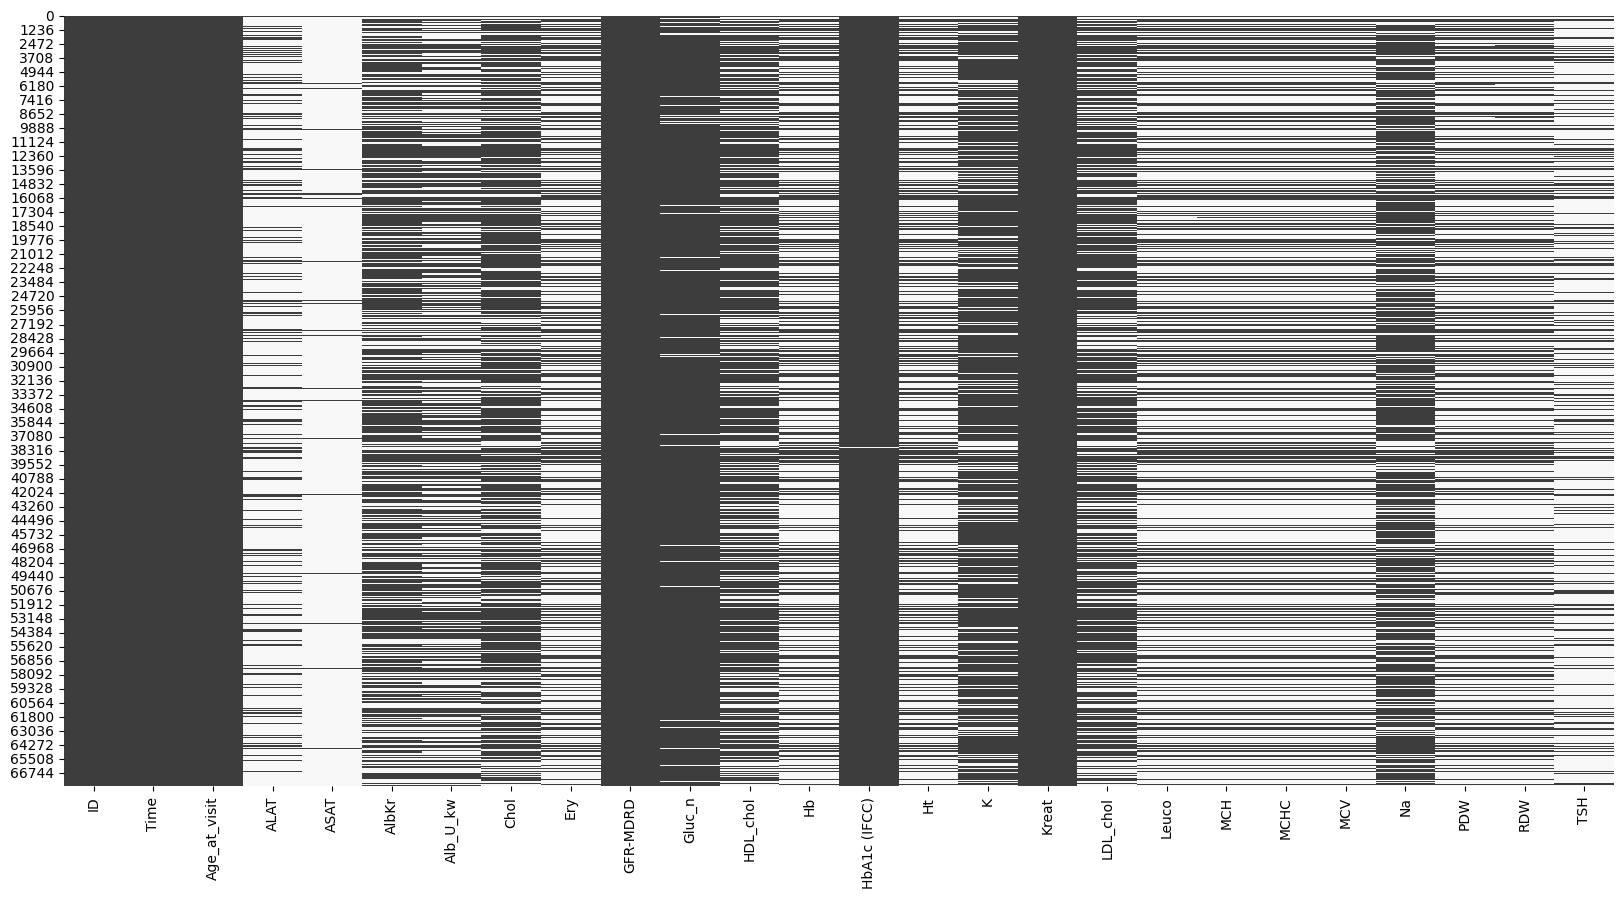

In [58]:
# Plot missingness in data
plt.figure(figsize=(20,10))

colours = ['#3D3D3D', '#F8F8F8'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False)

In [59]:
# Remove columns that are missing over 60% of their values
df = df.dropna(axis=1, thresh=int((1-0.6)*df.shape[0] + 1))

df

,ID,Time,Age_at_visit,AlbKr,Alb_U_kw,Chol,GFR-MDRD,Gluc_n,HDL_chol,HbA1c (IFCC),K,Kreat,LDL_chol,Na
0,0,2015-01-05,76.4,1.36,3.00,5.19,63.14,6.20,1.02,49.00,4.87,77.00,2.27,143.00
1,0,2015-03-11,76.6,NaN,NaN,4.06,32.19,8.80,1.58,54.00,4.68,138.00,1.97,144.00
2,0,2015-06-17,76.9,0.49,8.00,4.31,33.57,8.80,1.41,47.00,4.98,133.00,2.33,144.00
3,0,2015-12-15,77.4,0.44,8.00,4.13,32.67,5.60,1.43,50.00,5.10,136.00,2.14,146.00
4,0,2016-01-07,77.4,0.64,3.00,5.34,51.28,6.60,1.13,49.00,4.98,92.00,2.93,141.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67925,6792,2022-06-13,91.3,0.82,7.95,NaN,24.09,10.20,NaN,81.80,4.42,203.00,NaN,139.20
67926,6792,2022-06-27,91.3,NaN,NaN,NaN,24.52,14.40,NaN,77.80,NaN,200.00,NaN,NaN
67927,6792,2022-07-18,91.4,NaN,NaN,NaN,23.79,9.04,NaN,73.90,5.34,205.00,NaN,138.30
67928,6792,2022-08-15,91.4,1.19,12.40,6.11,23.64,7.68,0.85,62.20,4.66,206.00,3.87,139.50


In [60]:
if prune_empty_cols:
    # Remove patients who have a column that is completely empty, as we cannot use forward + backward filling on them
    df = df.groupby('ID').filter(lambda x: ~(x.isna().all().any()))

# Reset patient IDs
df['ID'] = df['ID'].astype('category')
df['ID'] = df['ID'].cat.codes

# Set Time to visit number
IDs = df["ID"].unique().tolist()
dfs = []

for id in IDs:
    subDf = df[df['ID'] == id]
    tempdf = subDf.copy()
    tempdf['Time'] = tempdf['Time'].astype('category')
    tempdf['Time'] = tempdf['Time'].cat.codes
    dfs.append(tempdf)

df = pd.concat(dfs)

df = df.sort_values(by=['ID','Time'], ascending = [True, True]).reset_index(drop = True)

# Convert columns to numeric types for imputation purposes
df = df.apply(pd.to_numeric)

df

,ID,Time,Age_at_visit,AlbKr,Alb_U_kw,Chol,GFR-MDRD,Gluc_n,HDL_chol,HbA1c (IFCC),K,Kreat,LDL_chol,Na
0,0,0,76.4,1.36,3.00,5.19,63.14,6.20,1.02,49.0,4.87,77.0,2.27,143.0
1,0,1,76.6,NaN,NaN,4.06,32.19,8.80,1.58,54.0,4.68,138.0,1.97,144.0
2,0,2,76.9,0.49,8.00,4.31,33.57,8.80,1.41,47.0,4.98,133.0,2.33,144.0
3,0,3,77.4,0.44,8.00,4.13,32.67,5.60,1.43,50.0,5.10,136.0,2.14,146.0
4,0,4,77.4,0.64,3.00,5.34,51.28,6.60,1.13,49.0,4.98,92.0,2.93,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66435,6643,5,91.3,0.82,7.95,NaN,24.09,10.20,NaN,81.8,4.42,203.0,NaN,139.2
66436,6643,6,91.3,NaN,NaN,NaN,24.52,14.40,NaN,77.8,NaN,200.0,NaN,NaN
66437,6643,7,91.4,NaN,NaN,NaN,23.79,9.04,NaN,73.9,5.34,205.0,NaN,138.3
66438,6643,8,91.4,1.19,12.40,6.11,23.64,7.68,0.85,62.2,4.66,206.0,3.87,139.5


In [61]:
# Impute using the chosen imputation method
if imputation_type == 1:
    # Event mean imputation
    df['ImputeTime'] = df['Time'].copy()
    df = df.groupby(['ImputeTime']).transform(lambda x: x.fillna(x.mean()))

elif imputation_type == 2:
    # Population mean imputation
    df = df.fillna(df.mean())

elif imputation_type == 3:
    # Forward and subsequent backward filling for each patient
    IDs = df["ID"].unique().tolist()
    dfs = []

    for id in IDs:
        subDf = df[df['ID'] == id]
        tempdf = subDf.copy()
        tempdf = tempdf.ffill().bfill()
        dfs.append(tempdf)

    df = pd.concat(dfs)

# Round scores to match original significance of each column
df.loc[:, df.columns != 'AGE_AT_VISIT'] = df.round(2)
df.loc[:, (df.columns == 'Hb') | (df.columns == 'MCHC') | (df.columns == 'MCV') | (df.columns == 'Na') | (df.columns == 'PDW') | (df.columns == 'RDW')] = df.round(1)

df

,ID,Time,Age_at_visit,AlbKr,Alb_U_kw,Chol,GFR-MDRD,Gluc_n,HDL_chol,HbA1c (IFCC),K,Kreat,LDL_chol,Na
0,0,0,76.4,1.36,3.00,5.19,63.14,6.20,1.02,49.0,4.87,77.0,2.27,143.0
1,0,1,76.6,1.36,3.00,4.06,32.19,8.80,1.58,54.0,4.68,138.0,1.97,144.0
2,0,2,76.9,0.49,8.00,4.31,33.57,8.80,1.41,47.0,4.98,133.0,2.33,144.0
3,0,3,77.4,0.44,8.00,4.13,32.67,5.60,1.43,50.0,5.10,136.0,2.14,146.0
4,0,4,77.4,0.64,3.00,5.34,51.28,6.60,1.13,49.0,4.98,92.0,2.93,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66435,6643,5,91.3,0.82,7.95,6.79,24.09,10.20,0.87,81.8,4.42,203.0,3.87,139.2
66436,6643,6,91.3,0.82,7.95,6.79,24.52,14.40,0.87,77.8,4.42,200.0,3.87,139.2
66437,6643,7,91.4,0.82,7.95,6.79,23.79,9.04,0.87,73.9,5.34,205.0,3.87,138.3
66438,6643,8,91.4,1.19,12.40,6.11,23.64,7.68,0.85,62.2,4.66,206.0,3.87,139.5


In [62]:
# Save the processed data
if imputation_type == 1 and prune_empty_cols:
    df.to_csv("Diabetes_processed_event_pruned.csv",index=False)
elif imputation_type == 1 and not prune_empty_cols:
    df.to_csv("Diabetes_processed_event.csv",index=False)

elif imputation_type == 2 and prune_empty_cols:
    df.to_csv("Diabetes_processed_pop_pruned.csv",index=False)
if imputation_type == 2 and not prune_empty_cols:
    df.to_csv("Diabetes_processed_pop.csv",index=False)

elif imputation_type == 3:
    df.to_csv("Diabetes_processed_ffbf_pruned.csv",index=False)

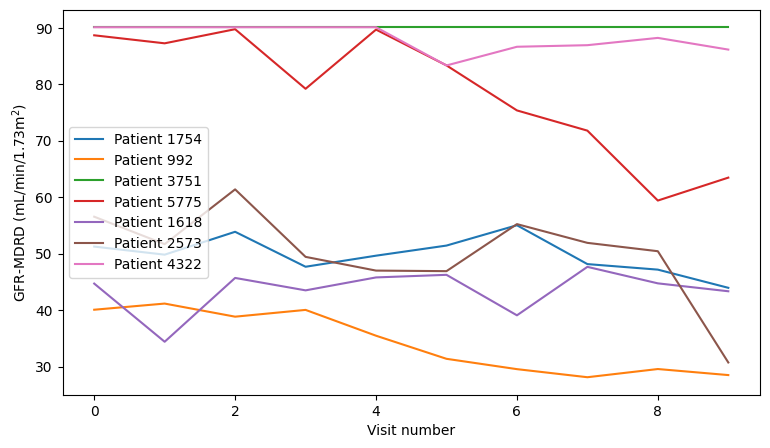

In [63]:
# Visualise the progression trajectory of various patients towards kidney failure based on their GFR-MDRD score
patientIDlist = random.sample(range(0, df.ID.max()), 7)
plt.figure(figsize=(9, 5))

for patientID in patientIDlist:
    seqs = df[df['ID'] == patientID]
    gfrmdrdlist = seqs['GFR-MDRD'].tolist()

    plt.plot(range(len(gfrmdrdlist)), gfrmdrdlist, label=('Patient '+str(patientID)))

plt.legend()
plt.xlabel("Visit number")
plt.ylabel("GFR-MDRD (mL/min/1.73m$^2$)")
plt.savefig('diabetesdatasequences.png')
plt.show()

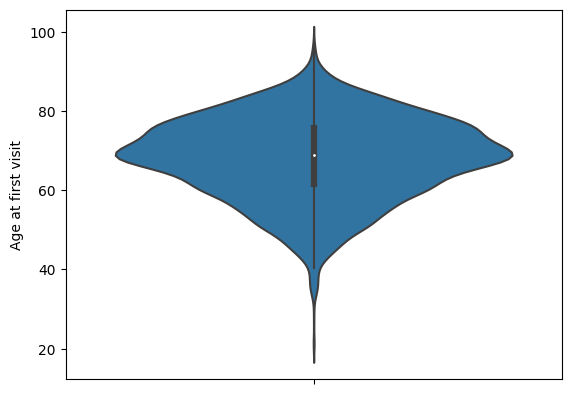

In [70]:
df2 = df.copy().rename(columns={"Age_at_visit" : "Age at first visit"})

df2 = df2[df2['Time'] == 0]

sns.violinplot(data=df2, y="Age at first visit")
plt.savefig('diabetes_agedistribution.png')

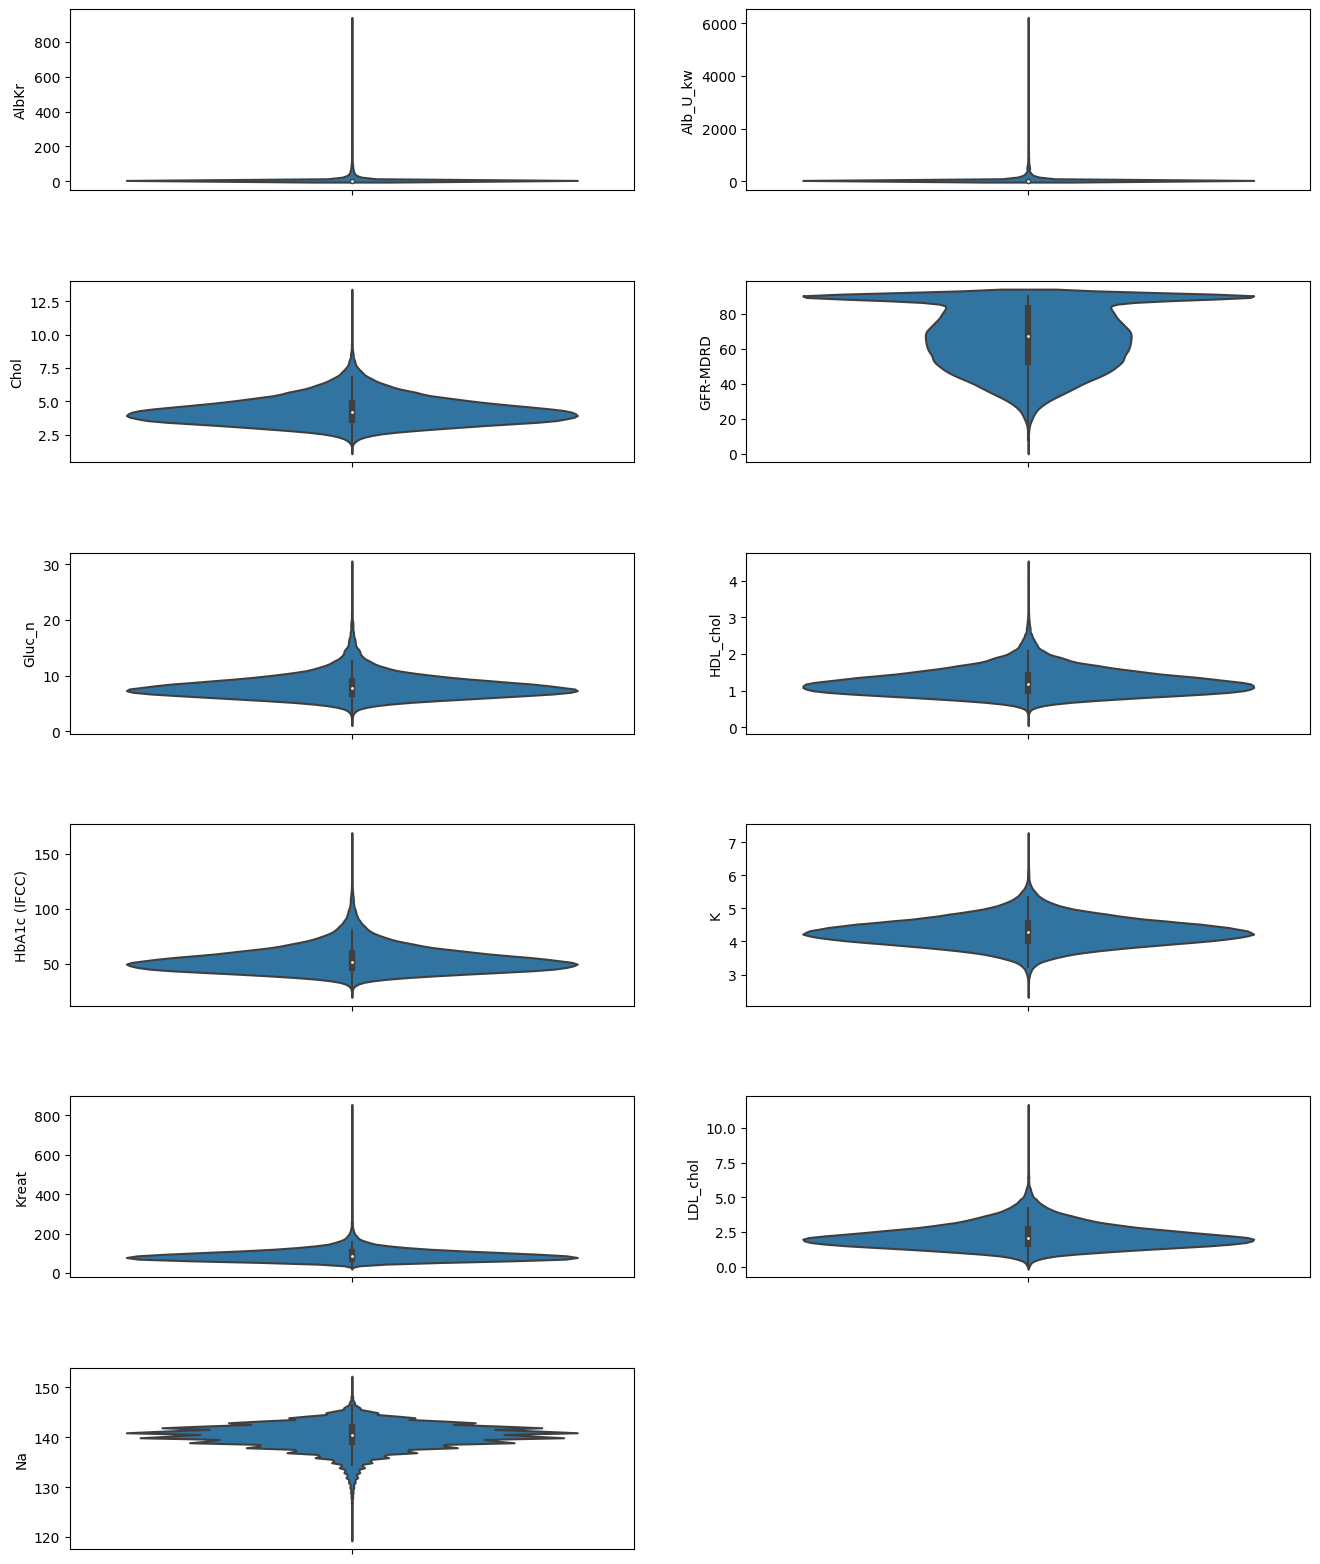

In [84]:
# 4 subplots in one row
fig, ax = plt.subplots(6, 2, figsize=(16, 20))

# draw boxplots - for one column in each subplot
sns.violinplot(data=df, y="AlbKr", ax=ax[0,0])
sns.violinplot(data=df, y="Alb_U_kw", ax=ax[0,1])
sns.violinplot(data=df, y="Chol", ax=ax[1,0])
sns.violinplot(data=df, y="GFR-MDRD", ax=ax[1,1])
sns.violinplot(data=df, y="Gluc_n", ax=ax[2,0])
sns.violinplot(data=df, y="HDL_chol", ax=ax[2,1])
sns.violinplot(data=df, y="HbA1c (IFCC)", ax=ax[3,0])
sns.violinplot(data=df, y="K", ax=ax[3,1])
sns.violinplot(data=df, y="Kreat", ax=ax[4,0])
sns.violinplot(data=df, y="LDL_chol", ax=ax[4,1])
sns.violinplot(data=df, y="Na", ax=ax[5,0])
ax[-1, -1].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('diabetes_biomarkerdistribution.png')
plt.show()